# This notebook gives you in-depth experience of regular expressions (RE)

## This will directly help you do Quiz-4 where you reap the rewards of learning about RE

## We will give you Quiz hints below (look for Quiz-hint below)

## We will also give you utility functions to run through many REs for your own practice

**-------------------------------------------------------------------------------------**


# !! VIDEO !!

## Please see

## QUIZ-4 HELP OVERVIEW VIDEO -- GMT20200921-203852_GANESH-GOP_1700x794.mp4

## The above will be loaded onto Youtube; till then, get it from Canvas!


**-------------------------------------------------------------------------------------**

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_DFA    import *
from jove.Def_NFA    import *
from jove.Def_RE2NFA import *
from jove.LangDef    import *  # for testing DFA actions using nthnumeric if needed
from jove.Def_NFA2RE import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accept

# RE recap

RE can be defined as follows

* $\varepsilon$ is an RE denoting the language $\{\varepsilon\}$

* $a\in\Sigma$ is an RE denoting the language $\{a\}$

* If $R$, $R_1$ and $R_2$ are RE, then
  - $R_1 R_2$ is an RE denoting the language concatenation of the individual languages
  - $R_1 + R_2$ is an RE denoting the language union of the individual languages
  - $R^*$ is an RE denoting the Star of the language of $R$
  
Notice that REs do not directly support these operations:

* Conjunction

* Complementation

We will make these operations available when we discuss Chapter-10 where RE derivatives provide a direct way to handle intersection and complementation

# RE properties

RE satisfy many equational properties. Our interest is in studying a few of these properties deeply and use them in proofs. We will also state certain ``obvious facts'' that will be used in our proofs.


Without loss of generality, assume that our alphabet is $\Sigma=\{a,b\}$.

* RE1: For any language $L$ over $\Sigma$, $L\subseteq \Sigma^*$; that is, $L\subseteq \{a,b\}^*$

* RE2: $L_1^* \subseteq (L_1 + L_2)^*$

* RE3: For REs $r, s, t$, we have $r(s+t) = rs+rt$

* RE4: For REs $r, s, t$, we have $(r+s)t = rt+st$

* RE5: For an RE $r$, we have $r^* = (\varepsilon + rr^*)$

* RE6: For an RE $r$, we have $r^* = (\varepsilon + r + rrr^*)$

* RE7: For REs $p$,$q$,$r$,$s$, we have $(p+q)(r+s) = (pr+ps+qr+qs)$, showing that concatenation tends to work like multiplication, yet again! This can be derived from RE3 and RE4.

# Below we provide many Sections and associated Quiz Questions  

## (I give the name "Section" for a single theme with multiple questions listed under it!)

# The options below are also on the Canvas Quiz where you must answer!

## (The reason to repeat the questions below is to make this document complete.)

### The true answers shall be revealed in a week.

# Section-1: This section leads you through the proof that $(a^* b^*)^* = (a+b)^*$

## Quiz-hint: For REs $s$ and $t$, to show $s=t$
 
### Show $s\subseteq t$
  
### Show $t\subseteq s$
  
## ===> For Quiz question Q1, 

### It is clear that the $s\subseteq t$ is TRUE (treating $s$ to be $(a^* b^*)^*$ and $t$ to be $(a+b)^*$) because  (...Your Answer...) (choose from the options offered)

* Option-1 : $(a+b)^*$ looks more comprehensive and likely that this is true

* Option-2 : In $(a^* b^*)^*$, the $a$'s and $b$'s must come in order, hence must be included in $(a+b)^*$

* Option-3 : While it appears that $(a^* b^*)^*$ lists the $a$ before the $b$, it could have been the other way too (e.g., $(b^* a^*)^*$) and both consider all strings of $a$'s and $b$'s

* Option-4 : We know that $(a+b)^*$ is the universal set, so $s\subseteq t$ is true!



# Continuing the proof of $(a^* b^*)^* = (a+b)^*$
  
### For the  $t\subseteq s$ part,
  
## ===> For Quiz question Q2, 

### we have to show $(a+b)^* \subseteq (a^* b^*)^*$

### But $(a^* b^*)^* =  ( (\varepsilon + a + aa a^*)  (\varepsilon + b + bb b^*) )^*$ because (...Your Answer...) (choose from the options offered) and this is advantageous because

* Option-1 : $a^*$ can be expanded into a set summation and so can $b^*$ be, as per RE5 and RE6

* Option-2 : This expansion will not help in the proof because it still leads to too many cases

* Option-3 : Setting up in this manner, as a summation, allows us to apply the distributive laws RE3 and RE4

* Option-4 : This expansion appears to be aiming for the rule RE2, but it won't be possible to use RE2 after all

# Continuing the proof of $(a^* b^*)^* = (a+b)^*$
  
## ===> For Quiz question Q3,

###  $ (\varepsilon + a + aa a^*)  (\varepsilon + b + bb b^*) = (a + b + X) $ for some RE $X$, because (...Your Answer...) (choose from the options offered), and this is advantageous because of this.


* Option-1 : We can never achieve this form, as $X$ will be an RE of infinite size

* Option-2 : This form can be achieved purely by using the rule RE3 and not using RE4

* Option-3 : We can employ RE7 and obtain this form.

* Option-4 : It will help us employ rule RE2 now.

# Continuing the proof of $(a^* b^*)^* = (a+b)^*$
  
## ===> For Quiz question Q4,

###  $   (a + b + X)^* \supseteq (a+b)^* $ because (...Your Answer...) (choose from the options offered)


* Option-1 : This can't be true. The universal set $(a+b)^*$ can never be contained inside another set.

* Option-2 : This can only mean one thing: that $X$ itself is contained within $(a+b)^*$.

* Option-3 : In general, we do have this result following directly from RE2.

* Option-4 : For this to be true, $X$ must be the Zero language; otherwise, there is a problem that something larger than a universal set is being discovered. 

# This finishes the proof of the $t \subseteq s$ part also.

**-------------------------------------------------------------------------------------**

# Section-2: REs that express bit patterns

## Example: The RE that expresses all even numbers is $(0+1)^* 0$

###  This is because this represents strings of bits ending in a $0$

#### Further detail: We get strings of the form $00$, $010$, $110$, etc., out of the above RE, and they are all even numbers.

## ===> For Question Q5: 

## The RE that expresses all powers of 4 of the form $4^n$ for $n\ge 0$ is

### (i.e. we want to summarize $4^0$, $4^1$, $4^2$, etc. using one RE)

* Option-1 : $0^* \; 1\; (00)^*$

* Option-2 : $0^* \; 1\; (0)^*\; (0)^*$

* Option-3 : $1\; (00) \; ((00)^* \; + \; 0)$

* Option-4 : $1\; (00 + \varepsilon) \; ((00)^* \; + \; \varepsilon)$


**-------------------------------------------------------------------------------------**

# Given R1 and R2, here is the the code to return (D1,D2) 
## Where D1 is the min DFA of Lang(R1)-Lang(R2)
## and D2 is the min DFA of Lang(R2)-Lang(R1)

In [2]:
def diff_RE(R1,R2):
    '''
    Given R1 and R2, here is the the code to return (D1,D2) 
    where D1 is the min DFA of Lang(R1)-Lang(R2)
    and D2 is the min DFA of Lang(R2)-Lang(R1)
    '''
    MD1=min_dfa_brz(nfa2dfa(re2nfa(R1)))
    MD2=min_dfa_brz(nfa2dfa(re2nfa(R2)))
    
    cMD1 = comp_dfa(MD1)
    cMD2 = comp_dfa(MD2)
    
    D1minus2 = min_dfa_brz(intersect_dfa(MD1, cMD2))
    D2minus1 = min_dfa_brz(intersect_dfa(MD2, cMD1))
    
    return (D1minus2, D2minus1)
    

In [22]:
R1 = "(a*b*)*"   #  OR "Your Favorite"
R2 = "(a+b)*" # OR "Your Favorite"

In [23]:
(d1,d2) = diff_RE(R1,R2)

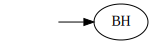

In [24]:
dotObj_dfa(d1)

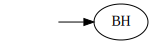

In [25]:
dotObj_dfa(d2)

**-------------------------------------------------------------------------------------**

# Section-3: Comparing two REs

## ===> For Question Q6:

## Look at these REs

### R1 = $(\; 0^* 1 (1 0^*)^* \;)$

### R2 = $(\; 0^* 1 (0^* 1) \;)^*$

### Answer the quiz questions associated with these REs


* Option-1 :  The languages of $R1$ and $R2$ are the same

* Option-2 :  There can be an arbitrary number of $101$ occurrences in many strings within $R1$'s language

* Option-3 :  Strings in $R2$'s language can end in a $0$

* Option-4 :  Strings in $R2$'s language cannot end in a $0$

In [21]:
R1 = "(0*1(10*)*)"   #  OR "Your Favorite"
R2 = "(0*1(0*1))*" # OR "Your Favorite"
(d1,d2) = diff_RE(R1,R2)
iso_dfa(d1,d2)

False

# Section-4: Postage-Stamp problems

## ===> For Question Q7:

* Option-1 :  The largest postage stamp value that one cannot make out of stamps with value $3,5,10$ is $7$

* Option-2 :  For the largest postage stamp value to exist, the set of all pairs of stamps in the set must be relatively prime

* Option-3 :  The largest postage stamp value that one cannot make out of stamps with value $5,10$ is undefined

* Option-4 :  The largest postage stamp value exists for any positive integer set of stamp values

In [26]:
RE_3_5_10 = "(111+11111+1111111111)*"
D_3_5_10  = min_dfa(nfa2dfa(re2nfa(RE_3_5_10)))
len(D_3_5_10['Q']) - 2

7

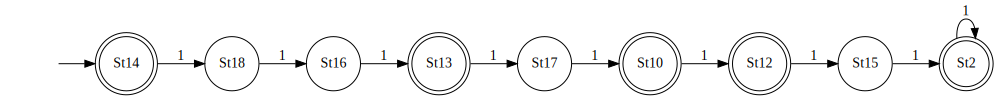

In [27]:
dotObj_dfa(D_3_5_10)

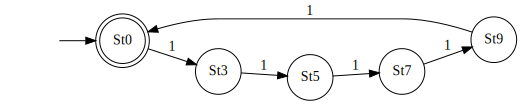

In [28]:
RE_5_10 = "(11111+1111111111)*"
D_5_10  = min_dfa(nfa2dfa(re2nfa(RE_5_10)))
dotObj_dfa(D_5_10)

# Section-5: Error-Correcting DFA

## ===> For Question Q8:

## Suppose we allow any N bits to be wrong in a sequence $....010101....$ expected at the receiving end. Then, the RE that models this situation satisfies the following properties (note that the "..." mean "any bit at all, or no bits")


* Option-1 :   The DFA for four bits being incorrect can be obtained by reversing the DFA with four bits being correct.

* Option-2 :   If $N=2$, we can write the RE as $(0+1)* PQRSTU (0+1)*$   with any two of P,Q,R,S,T,U being $(0+1)$ and the other two being the intended bits.

* Option-3 :   If $N=6$, we can write the whole RE as $(0+1)*(0+1)^6(0+1)^*$

* Option-4 :   We can never produce an error-correcting DFA that also told us how many bits were wrong.

# Section-6: Kleene Pipeline Questions

## ===> For Question Q9:

## Given these functions, the following is how I implement a new function "nfaMinComp" NFA complementation to produce a minimal DFA for a given NFA N's complement.

### SUPPOSE I am given these functions

* nfa2dfa -- the current NFA to DFA function

* rev_dfa -- the current function to reverse a DFA

* comp_dfa -- the current complementation function for DFA

* min_dfa -- the current minimizer for DFA

* rev_nfa -- a new function that could be implemented similar to rev_dfa to reverse an NFA (this is not hard to do)

 

### Here is how I'll write nfaMinComp:

* Option-1 : nfa2dfa(rev_nfa(N))

* Option-2 : comp_dfa(nfa2dfa(N))

* Option-3 : comp_dfa(min_dfa(nfa2dfa(N)))

* Option-4 : min_dfa(comp_dfa(nfa2dfa(N)))

In [40]:
N = re2nfa("(0*1(0*1))*")

In [31]:
nfa2dfa(rev_nfa(N))

NameError: name 'rev_nfa' is not defined

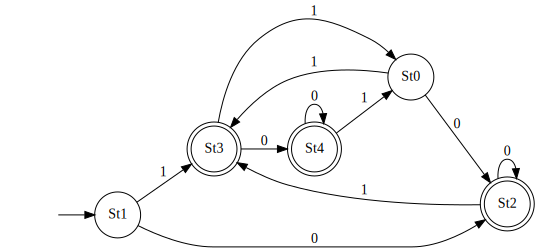

In [37]:
dotObj_dfa(comp_dfa(nfa2dfa(N)))

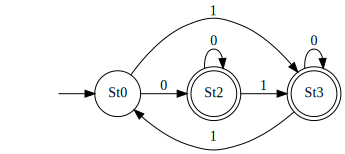

In [38]:
dotObj_dfa(comp_dfa(min_dfa(nfa2dfa(N))))

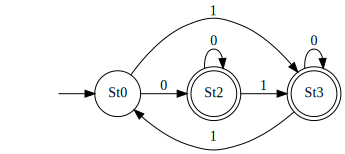

In [39]:
dotObj_dfa(min_dfa(comp_dfa(nfa2dfa(N))))



## ===> For Question Q10:

## The RE for the set of strings that do not have any occurrence of 001 satisfies these properties (call this the No001 language)

* Option-1 :    If anything were to occur after a $0$, it must be a $1$ or a string of $0$'s.

* Option-2 :    When a $01$ is seen, all strings in $((0+\varepsilon)1)^*$  may follow

* Option-3 :    When a $0$ is seen, a $0^*$ must follow

* Option-4 :    The language No001 is closed under reversal

In [9]:
help(dfa2nfa)

Help on function dfa2nfa in module jove.Def_NFA2RE:

dfa2nfa(D)
    Given a DFA D, make a language-equivalent NFA.



In [10]:
Has001   = "(0+1)*001(0+1)*"
HasNo001 = "(01+1)*0*"

In [11]:
(d1,d2) = diff_RE(Has001, HasNo001)

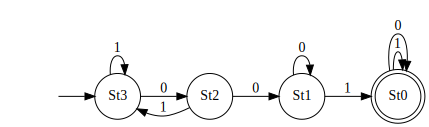

In [12]:
dotObj_dfa(min_dfa_brz(nfa2dfa(re2nfa(Has001))))

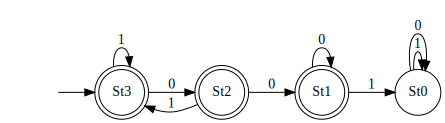

In [13]:
dotObj_dfa(comp_dfa(min_dfa_brz(nfa2dfa(re2nfa(Has001)))))

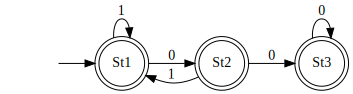

In [14]:
dotObj_dfa(min_dfa_brz(nfa2dfa(re2nfa(HasNo001))))

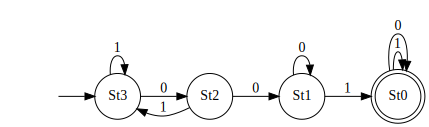

In [15]:
dotObj_dfa(d1)

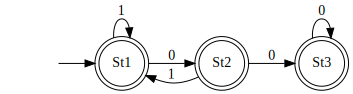

In [16]:
dotObj_dfa(d2)